# Análisis exploratorio de datos de trayectorias de albatros de Laysan

Minería de datos

Presenta: Ana Maritza Bello Yañez

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
trajectories = pd.read_csv('../data/trajectories.csv')
trajectories.head()

,id,geom,date,latitude,longitude,name,season,spheroid_dist_to_colony,sst
0,1,POINT(-118.327013 29.110365),2014-01-19,29.110365,-118.32701,LAAL01,incubacion,0.0,17.581
1,2,POINT(-118.327008 29.110315),2014-01-19,29.110315,-118.32701,LAAL01,incubacion,0.0,17.581
2,3,POINT(-118.327022 29.11034),2014-01-19,29.110340,-118.32702,LAAL01,incubacion,0.0,17.581
3,4,POINT(-118.327045 29.110412),2014-01-19,29.110413,-118.32704,LAAL01,incubacion,0.0,17.581
4,5,POINT(-118.326942 29.110427),2014-01-19,29.110428,-118.32694,LAAL01,incubacion,0.0,17.581


In [4]:
trajectories["date"] = trajectories["date"].astype("datetime64[ns]")
trajectories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176767 entries, 0 to 176766
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       176767 non-null  int64         
 1   geom                     176767 non-null  object        
 2   date                     176767 non-null  datetime64[ns]
 3   latitude                 176767 non-null  float64       
 4   longitude                176767 non-null  float64       
 5   name                     176767 non-null  object        
 6   season                   176767 non-null  object        
 7   spheroid_dist_to_colony  176767 non-null  float64       
 8   sst                      176766 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 12.1+ MB


In [5]:
trajectories.nunique()

id                         176767
geom                       167663
date                          346
latitude                   114593
longitude                  110074
name                           47
season                          4
spheroid_dist_to_colony    148073
sst                         12291
dtype: int64

<Axes: title={'center': 'Numero de datos por mes y año'}, xlabel='Año, mes', ylabel='Cantidad de datos'>

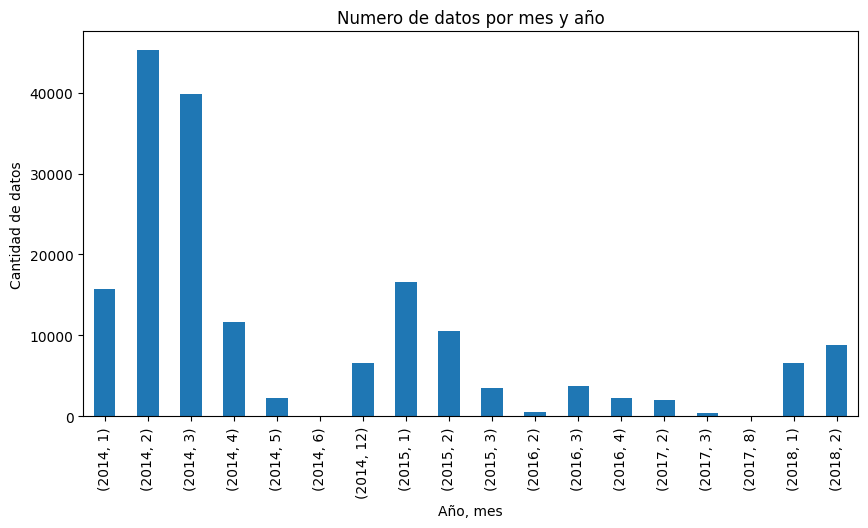

In [6]:
trajectories["day"] = trajectories["date"].dt.day
trajectories["month"] = trajectories["date"].dt.month
trajectories["year"] = trajectories["date"].dt.year
data_by_year = trajectories.groupby(["year", "month"]).size()
data_by_year.plot(kind="bar", figsize=(10, 5), 
                  title="Numero de datos por mes y año", 
                  xlabel="Año, mes", ylabel="Cantidad de datos")

<Axes: title={'center': 'Numero de datos por mes (todos los años)'}, xlabel='Mes', ylabel='Cantidad de datos'>

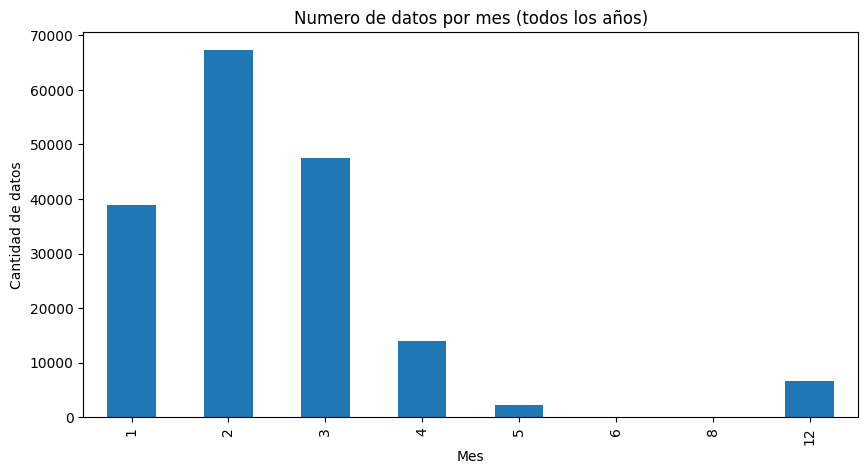

In [7]:
data_by_month = trajectories.groupby(["month"]).size()
data_by_month.plot(kind="bar", figsize=(10, 5), 
                  title="Numero de datos por mes (todos los años)", 
                  xlabel="Mes", ylabel="Cantidad de datos",)

Text(0.5, 1.0, 'Cantidad de datos disponibles por temporada reproductiva y año')

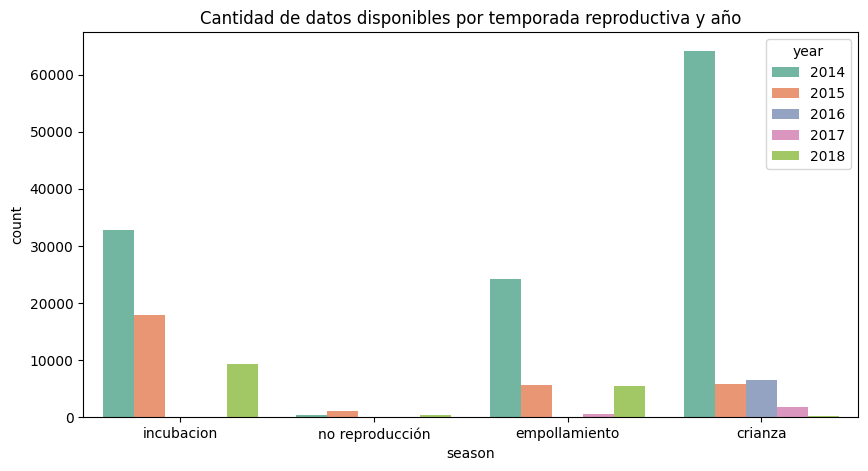

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=trajectories, x="season", hue="year", palette="Set2",)
plt.title("Cantidad de datos disponibles por temporada reproductiva y año")

In [9]:
sst_eda = trajectories["sst"].groupby(trajectories["month"])
sst_eda.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,38947.0,16.361966,2.819751,7.795,14.74000,17.686,18.1190,20.777
2,67238.0,16.806843,1.652451,6.641,16.40600,17.051,17.5540,20.613
3,47594.0,16.438794,2.278308,6.657,16.49800,17.214,17.5490,21.107
4,13968.0,16.138850,3.010759,5.705,16.42300,17.076,17.5050,21.405
5,2303.0,18.266947,0.518796,17.202,17.96750,18.224,18.4855,20.056
6,2.0,19.750000,0.000000,19.750,19.75000,19.750,19.7500,19.750
8,102.0,21.638618,0.164618,21.262,21.59075,21.706,21.7360,21.816
12,6612.0,18.496483,2.666654,8.227,19.01200,19.393,19.7970,20.732


Text(0, 0.5, 'SST (°C)')

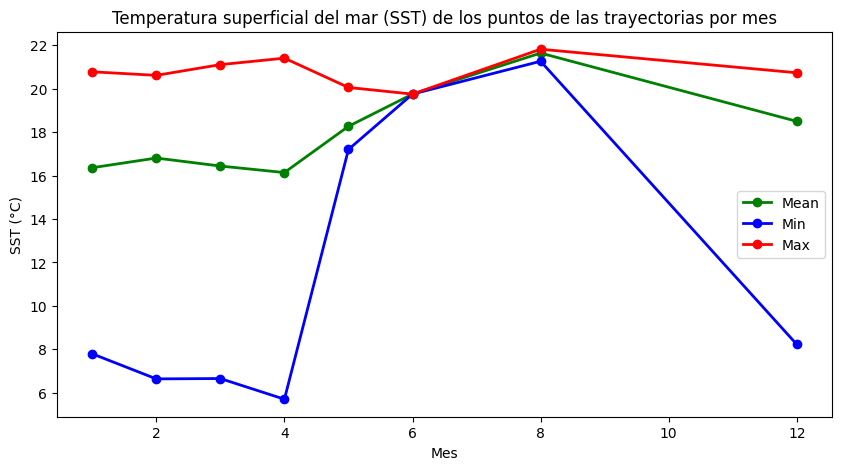

In [10]:
# Plot EDA for SST (Min, mean, max)

plt.figure(figsize=(10, 5))
plt.title("Temperatura superficial del mar (SST) de los puntos de las trayectorias por mes")
sst_eda.mean().plot(label="Mean", color="green", linewidth=2, marker="o")
sst_eda.min().plot(label="Min", color="blue", linewidth=2, marker="o")
sst_eda.max().plot(label="Max", color='red', linewidth=2, marker="o")
plt.legend()
plt.xlabel("Mes")
plt.ylabel("SST (°C)")


In [11]:
distance_eda = trajectories["spheroid_dist_to_colony"].groupby(trajectories["month"])
distance_eda.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,38947.0,690.455467,981.642874,0.0,0.019047,0.086922,1303.820650,3895.649200
2,67239.0,252.214922,496.795611,0.0,0.046487,37.166943,227.645135,3474.546900
3,47594.0,362.253032,659.229383,0.0,57.874054,170.416355,239.247505,3577.749800
4,13968.0,537.811615,957.774851,0.0,45.881220,153.165930,225.560400,3528.655300
5,2303.0,112.398576,57.001763,0.0,65.148479,140.218960,158.741700,197.794570
6,2.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,102.0,0.117898,0.374290,0.0,0.000000,0.012286,0.026232,2.499353
12,6612.0,476.709914,924.170998,0.0,0.000000,0.019157,319.125998,3372.066200


Text(0, 0.5, 'Distancia (km)')

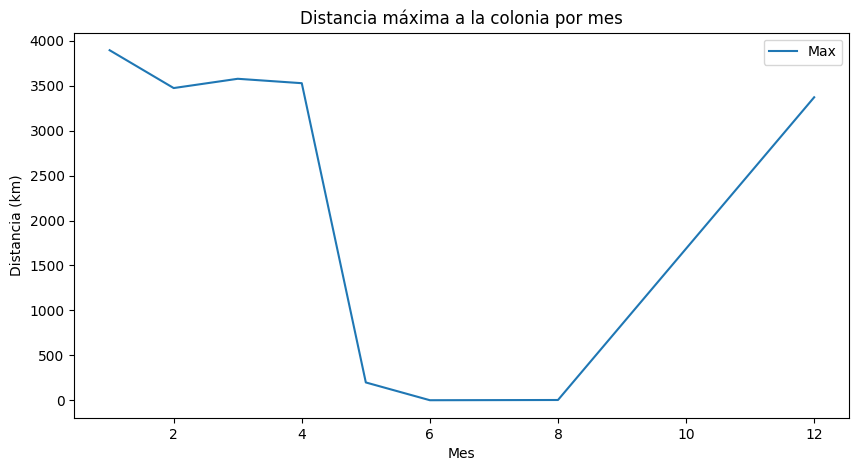

In [26]:
# Gráfica de la distancia a la colonia por mes (Min, mean, max)

plt.figure(figsize=(10, 5))
plt.title("Distancia máxima a la colonia por mes")
distance_eda.max().plot(label="Max")
plt.legend()
plt.xlabel("Mes")
plt.ylabel("Distancia (km)")


In [13]:
latitude_bp = trajectories["longitude"].groupby(trajectories["season"])
latitude_bp.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
crianza,78656.0,-119.930254,6.512082,-152.48462,-118.988528,-118.290810,-116.732137,-114.42687
empollamiento,36047.0,-118.821732,1.987504,-134.77740,-118.667530,-118.291910,-118.291010,-115.08897
incubacion,60052.0,-123.130844,8.225292,-158.98053,-125.916035,-118.292080,-118.291480,-116.21005
no reproducción,2012.0,-122.608585,8.280744,-149.29865,-121.827005,-118.291918,-118.291440,-118.25123


In [14]:
latitude_bp = trajectories["latitude"].groupby(trajectories["season"])
latitude_bp.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
crianza,78656.0,31.106044,4.513409,26.377728,28.884100,29.387503,30.636786,50.856987
empollamiento,36047.0,29.578935,1.661481,27.067830,28.883833,28.884655,29.816597,47.218990
incubacion,60052.0,32.050418,5.368645,25.933687,28.883862,28.884527,33.972980,51.257980
no reproducción,2012.0,31.281592,5.169273,27.298212,28.883812,28.884066,28.884655,44.503536


<Axes: xlabel='longitude', ylabel='latitude'>

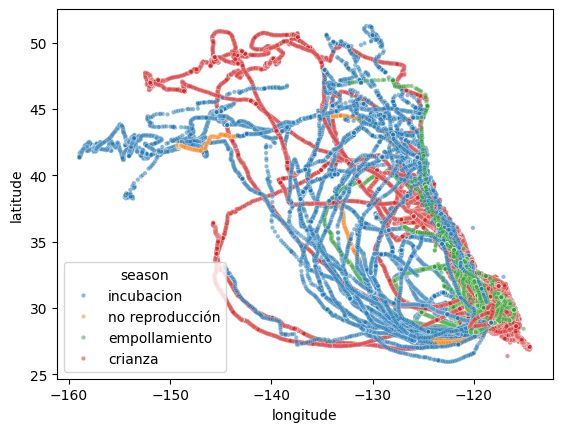

In [15]:
sns.scatterplot(data = trajectories, x="longitude", y="latitude", hue="season", alpha=0.5, s=10)

# Distribución geográfica durante la incubación

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de incubacion del año 2014')

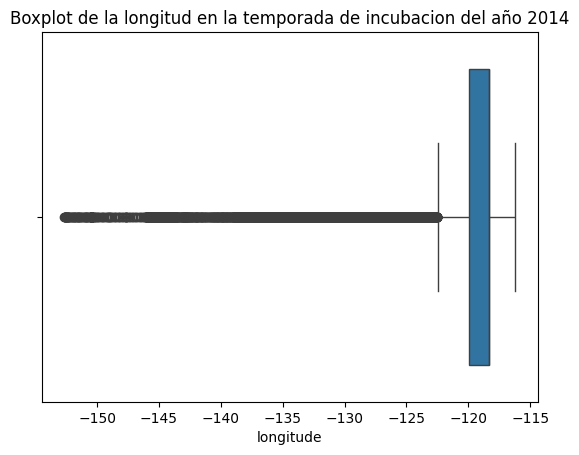

In [16]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)], x="longitude")
plt.title("Boxplot de la longitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de incubacion del año 2015')

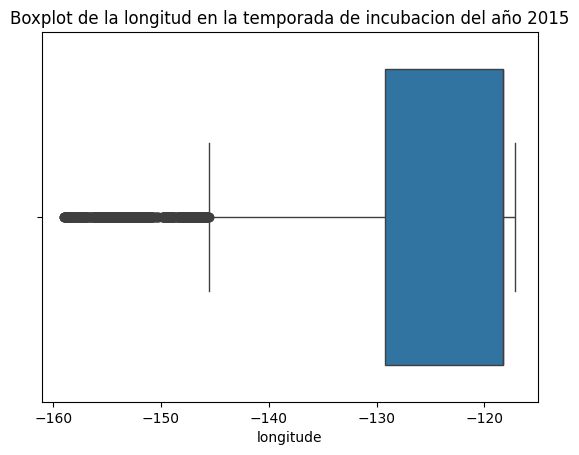

In [17]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2015)], x="longitude")
plt.title("Boxplot de la longitud en la temporada de incubacion del año 2015")

Text(0.5, 1.0, 'Histograma de la longitud en la temporada de incubacion del año 2014')

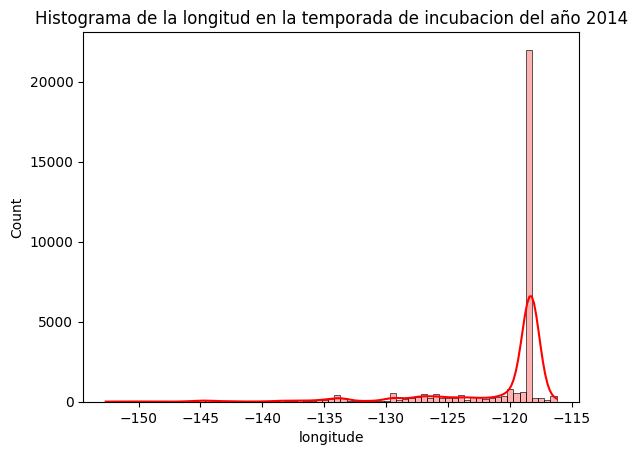

In [18]:
sns.histplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)],
             x="longitude", binwidth=0.5, kde=True, color="red", alpha=0.3)
plt.title("Histograma de la longitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de incubacion del año 2014')

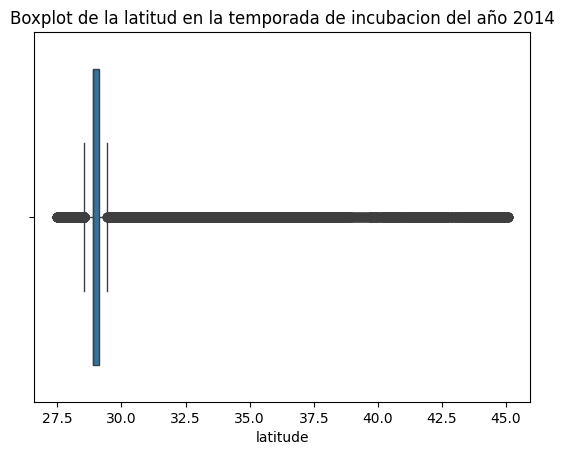

In [19]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)], x="latitude")
plt.title("Boxplot de la latitud en la temporada de incubacion del año 2014")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de incubacion del año 2015')

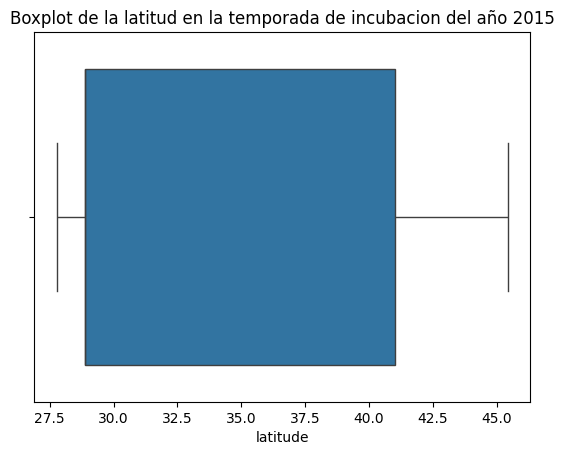

In [20]:
sns.boxplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2015)], x="latitude")
plt.title("Boxplot de la latitud en la temporada de incubacion del año 2015")

Text(0.5, 1.0, 'Histograma de la latitud en la temporada de incubacion')

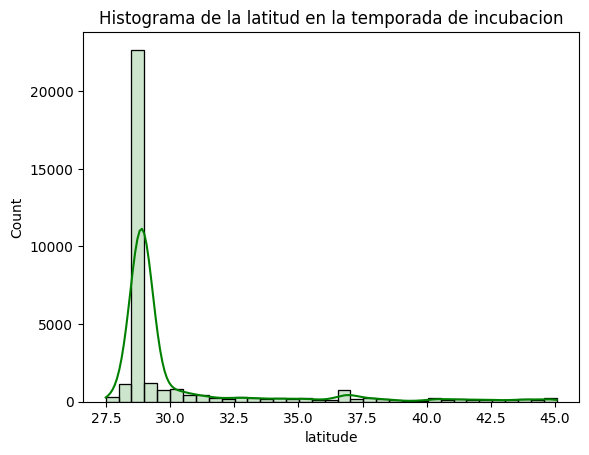

In [21]:
sns.histplot(data = trajectories[(trajectories["season"]=="incubacion") & (trajectories["year"]==2014)],
             x="latitude", binwidth=0.5, kde=True, color="green", alpha=0.2)
plt.title("Histograma de la latitud en la temporada de incubacion")

# Distribución geográfica durante la crianza

Text(0.5, 1.0, 'Boxplot de la longitud en la temporada de crianza')

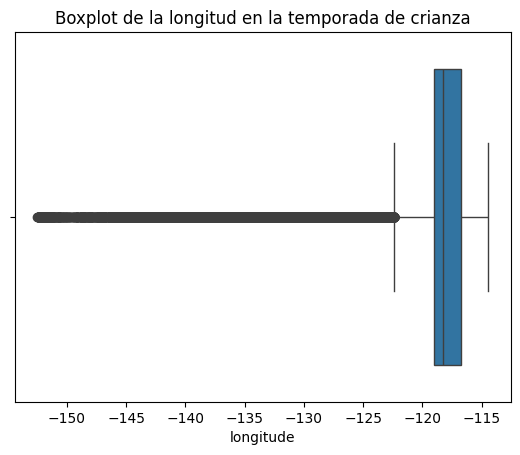

In [22]:
sns.boxplot(data = trajectories[trajectories["season"]=="crianza"], x="longitude")
plt.title("Boxplot de la longitud en la temporada de crianza")

Text(0.5, 1.0, 'Histograma de la longitud en la temporada de crianza')

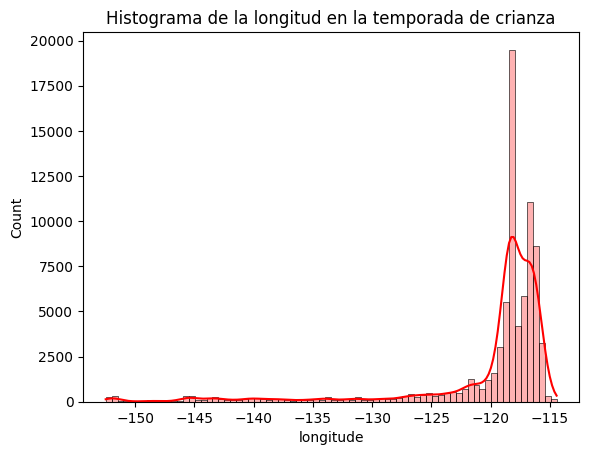

In [23]:
sns.histplot(data = trajectories[trajectories["season"]=="crianza"],
             x="longitude", binwidth=0.5, kde=True, color="red", alpha=0.3)
plt.title("Histograma de la longitud en la temporada de crianza")

Text(0.5, 1.0, 'Boxplot de la latitud en la temporada de crianza')

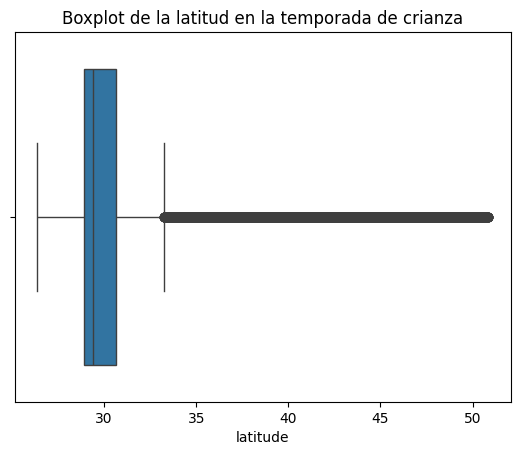

In [24]:
sns.boxplot(data = trajectories[trajectories["season"]=="crianza"], x="latitude")
plt.title("Boxplot de la latitud en la temporada de crianza")

Text(0.5, 1.0, 'Histograma de la latitud en la temporada de crianza')

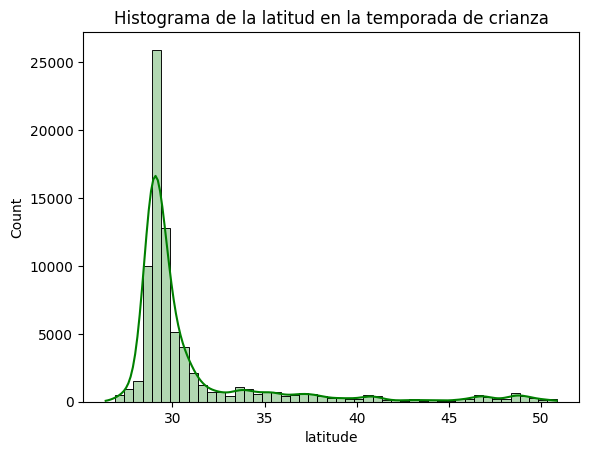

In [25]:
sns.histplot(data = trajectories[trajectories["season"]=="crianza"],
             x="latitude", binwidth=0.5, kde=True, color="green", alpha=0.3)
plt.title("Histograma de la latitud en la temporada de crianza")